## Health Care for All Case Study using Pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

## EDA and Plotting

In [2]:
hk_df=pd.read_csv("hk_df_cleaned.csv")

In [3]:
hk_df.columns

Index(['state', 'gender', 'median_home_val', 'avg_fam_income',
       'avg_household_income', 'med_fam_income', 'median_household_income',
       'hvp1', 'per_capita_income', 'pobc2', 'avggift', 'domain', 'target_d'],
      dtype='object')

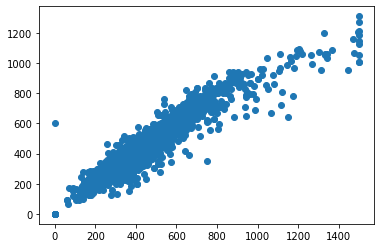

In [4]:
plt.scatter(x=hk_df['med_fam_income'], y=hk_df['avg_household_income'])
plt.show()

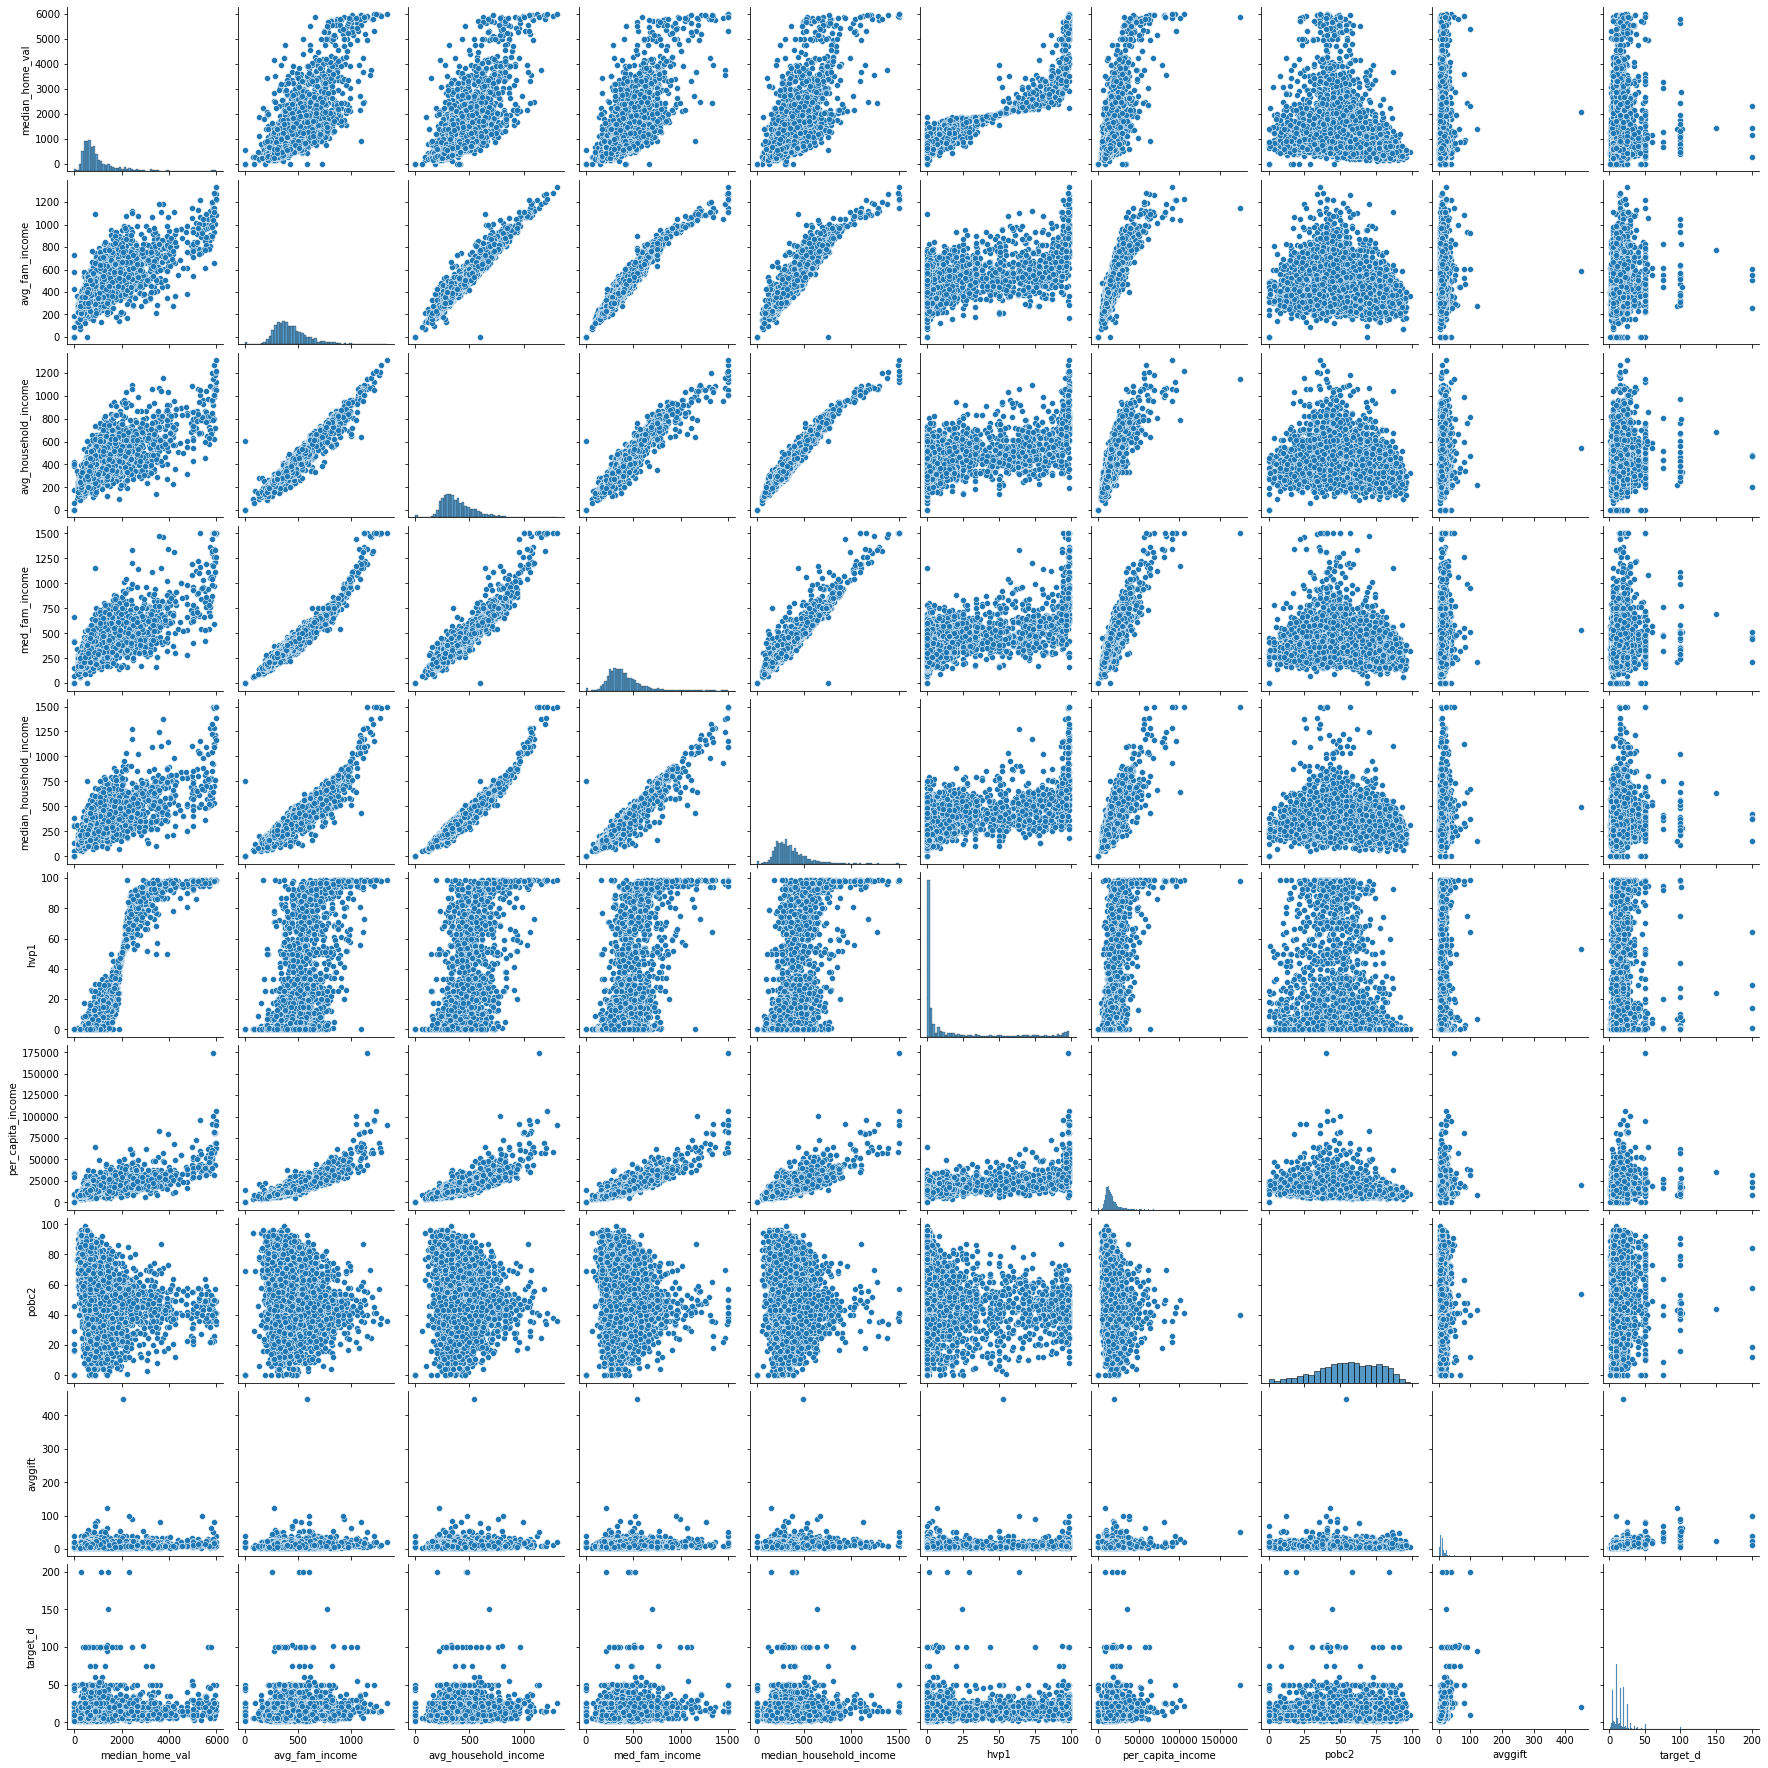

In [5]:
sns.pairplot(hk_df)

array([[<AxesSubplot:title={'center':'median_home_val'}>,
        <AxesSubplot:title={'center':'avg_fam_income'}>,
        <AxesSubplot:title={'center':'avg_household_income'}>],
       [<AxesSubplot:title={'center':'med_fam_income'}>,
        <AxesSubplot:title={'center':'median_household_income'}>,
        <AxesSubplot:title={'center':'hvp1'}>],
       [<AxesSubplot:title={'center':'per_capita_income'}>,
        <AxesSubplot:title={'center':'pobc2'}>,
        <AxesSubplot:title={'center':'avggift'}>],
       [<AxesSubplot:title={'center':'target_d'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

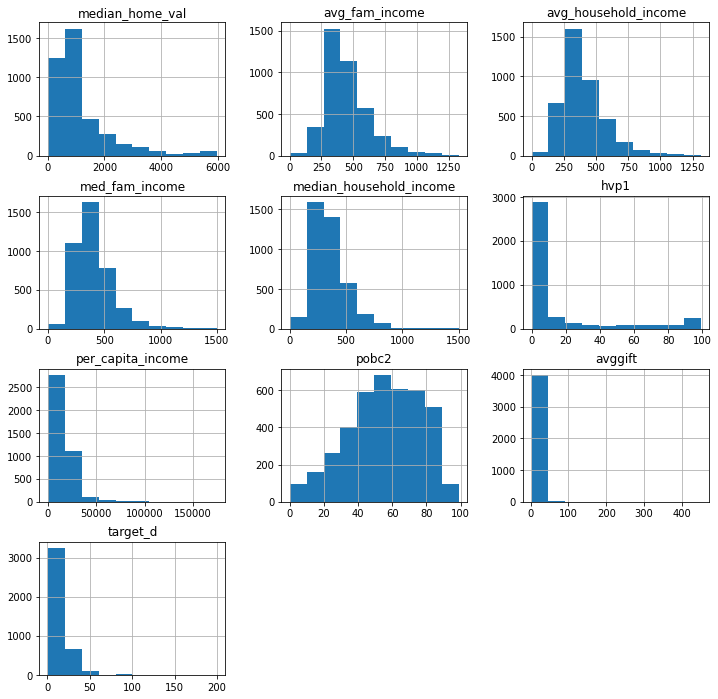

In [6]:
hk_df.hist(figsize=(12,12))

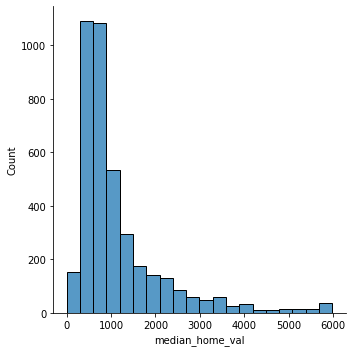

In [7]:
sns.displot((hk_df['median_home_val']), bins=20)

In [8]:
hk_df

,state,gender,median_home_val,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,domain,target_d
0,FL,Male,1159.148591,520.0,466,430.0,392,7,21975.0,16,28,C2,100.0
1,IL,Male,537.000000,473.0,410,415.0,365,0,19387.0,89,5,T2,7.0
2,FL,Female,725.000000,436.0,361,340.0,301,3,18837.0,17,4,C2,5.0
3,NC,Male,1159.148591,413.0,399,407.0,401,7,14014.0,74,27,T2,38.0
4,FL,Female,995.000000,348.0,316,280.0,252,0,17991.0,6,6,C2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,FL,Female,742.000000,470.0,450,424.0,396,0,15356.0,37,14,S2,50.0
4016,FL,Male,599.000000,423.0,200,406.0,100,4,11670.0,27,9,C1,10.0
4017,ND,Male,593.000000,299.0,274,298.0,258,0,10186.0,70,5,S2,5.0
4018,WI,U,564.000000,397.0,295,386.0,217,0,12315.0,96,11,T2,14.0


<b>Power Transformer

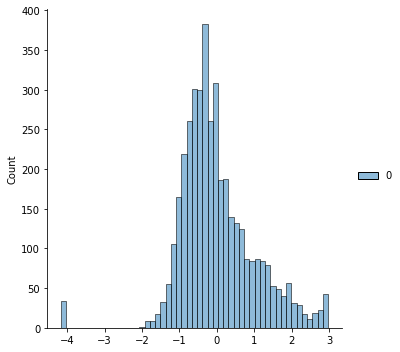

In [9]:
pt = PowerTransformer()
med_home_val_transformed=pt.fit_transform(hk_df['median_home_val'].to_numpy().reshape(-1,1))
sns.displot(med_home_val_transformed)

In [10]:
##crud
hk_df["med_home_val_transformed"]= med_home_val_transformed
hk_df.drop(["median_home_val"],axis=1,inplace=True)

In [11]:
hk_df

,state,gender,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,domain,target_d,med_home_val_transformed
0,FL,Male,520.0,466,430.0,392,7,21975.0,16,28,C2,100.0,0.294846
1,IL,Male,473.0,410,415.0,365,0,19387.0,89,5,T2,7.0,-0.636833
2,FL,Female,436.0,361,340.0,301,3,18837.0,17,4,C2,5.0,-0.294111
3,NC,Male,413.0,399,407.0,401,7,14014.0,74,27,T2,38.0,0.294846
4,FL,Female,348.0,316,280.0,252,0,17991.0,6,6,C2,5.0,0.095725
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,FL,Female,470.0,450,424.0,396,0,15356.0,37,14,S2,50.0,-0.266584
4016,FL,Male,423.0,200,406.0,100,4,11670.0,27,9,C1,10.0,-0.514993
4017,ND,Male,299.0,274,298.0,258,0,10186.0,70,5,S2,5.0,-0.526356
4018,WI,U,397.0,295,386.0,217,0,12315.0,96,11,T2,14.0,-0.582535


In [12]:
hk_df.corr()

,avg_fam_income,avg_household_income,med_fam_income,median_household_income,hvp1,per_capita_income,pobc2,avggift,target_d,med_home_val_transformed
avg_fam_income,1.000000,0.971836,0.971506,0.928871,0.655683,0.868590,-0.188200,0.133512,0.131467,0.774526
avg_household_income,0.971836,1.000000,0.953457,0.974811,0.647076,0.827779,-0.177718,0.126355,0.122328,0.766023
med_fam_income,0.971506,0.953457,1.000000,0.951152,0.636358,0.874875,-0.162568,0.137010,0.129900,0.743238
median_household_income,0.928871,0.974811,0.951152,1.000000,0.610842,0.805333,-0.149607,0.121198,0.113411,0.719779
hvp1,0.655683,0.647076,0.636358,0.610842,1.000000,0.627228,-0.260485,0.127827,0.103891,0.836741
per_capita_income,0.868590,0.827779,0.874875,0.805333,0.627228,1.000000,-0.248571,0.142640,0.138107,0.693802
pobc2,-0.188200,-0.177718,-0.162568,-0.149607,-0.260485,-0.248571,1.000000,-0.076623,-0.073461,-0.290786
avggift,0.133512,0.126355,0.137010,0.121198,0.127827,0.142640,-0.076623,1.000000,0.487661,0.132895
target_d,0.131467,0.122328,0.129900,0.113411,0.103891,0.138107,-0.073461,0.487661,1.000000,0.109231
med_home_val_transformed,0.774526,0.766023,0.743238,0.719779,0.836741,0.693802,-0.290786,0.132895,0.109231,1.000000


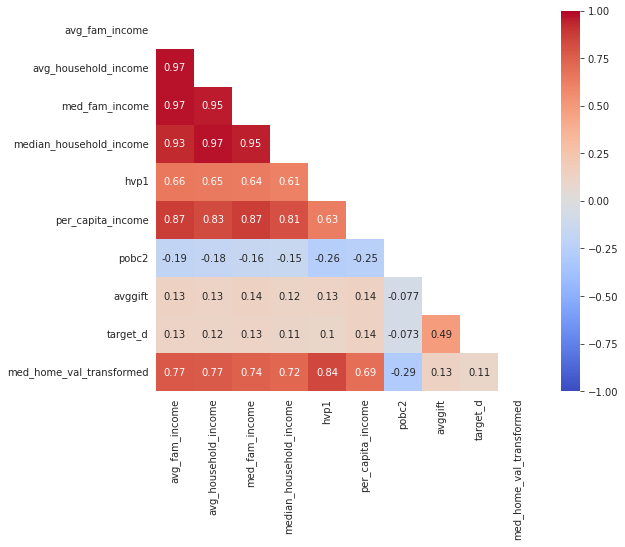

In [13]:
corr = hk_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

### Highly Correlated Columns

In [ ]:
corr_matrix=hk_df.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]

### dropping highly correlated features

In [ ]:
hk_df.drop(["per_capita_income","hvp1","avg_household_income","median_household_income","med_fam_income"],axis=1,inplace=True)

In [ ]:
hk_df